# **SVM | RF | KNN – Wine Dataset**


## Wine Dataset



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

### Loading data from CSV

In [ ]:
# Load dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
names = ['class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
dataframe = pd.read_csv(url, names=names, index_col=False)

In [ ]:
dataframe.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Pre-Processing

In [ ]:
# Handle missing values
dataframe.isna().sum()


class                           0
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

Dataset is clean. There is no missing values therefore, no further processing required to remove or imputate missing data

In [ ]:
print(dataframe['class'].unique())

[1 2 3]


In [ ]:
# Handle data types
dataframe.dtypes

class                             int64
alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                         int64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                           int64
dtype: object

In [ ]:
# Convert class column to categorical type
dataframe["class"] = dataframe["class"].astype("category")

print(dataframe['class'].unique())

# use the LabelEncoder to convert categorical variables into numerical values
encoder = LabelEncoder()
dataframe["class"] = encoder.fit_transform(dataframe["class"])

[1, 2, 3]
Categories (3, int64): [1, 2, 3]


In [ ]:
dataframe.dtypes

class                             int64
alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                         int64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                           int64
dtype: object

In [ ]:
# perform feature scaling
scaler = StandardScaler()
dataframe[dataframe.columns[1:]] = scaler.fit_transform(dataframe[dataframe.columns[1:]])


In [ ]:
dataframe.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,0,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


### Split Train and Test set


In [ ]:
# Split the data into features and target
X = dataframe.drop('class', axis=1)
y = dataframe['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Applying Support Vector Machine (SVM)

First step is to determine best Kernel fuction for given dataset

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:2126: UserWarning: labels size, 2, does not match size of target_names, 3
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:2126: UserWarning: labels size, 2, does not match size of target_names, 3
  warnings.warn(


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        16

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

              precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.94      0.94      0.94        16

   micro avg       0.93      0.93      0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:2126: UserWarning: labels size, 2, does not match size of target_names, 3
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:2126: UserWarning: labels size, 2, does not match size of target_names, 3
  warnings.warn(


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        16

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.94      0.97        16

   micro avg       1.00      0.97      0.98        30
   macro avg       1.00      0.97      0.98        30
weighted avg       1.00      0.97      0.98        30

Best kernel: linear
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score:1.00


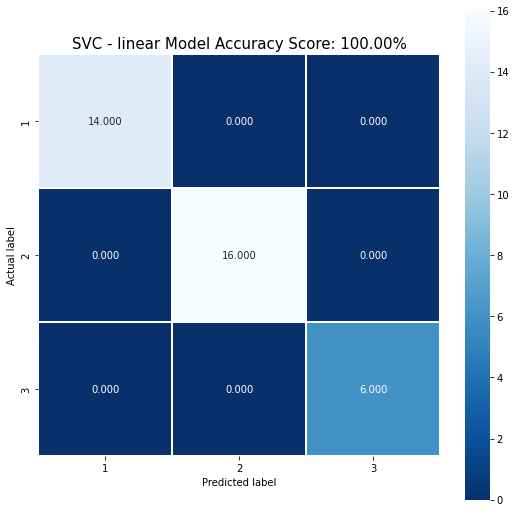

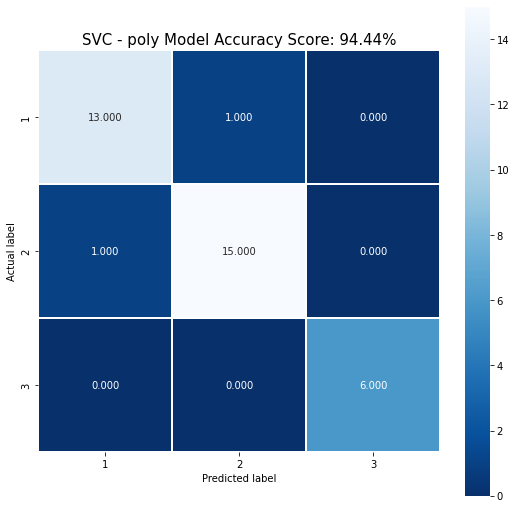

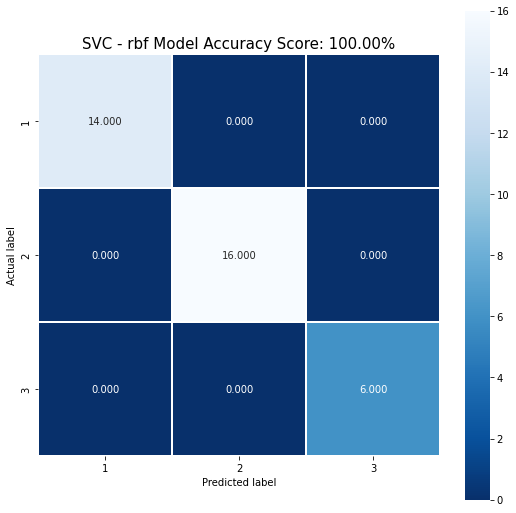

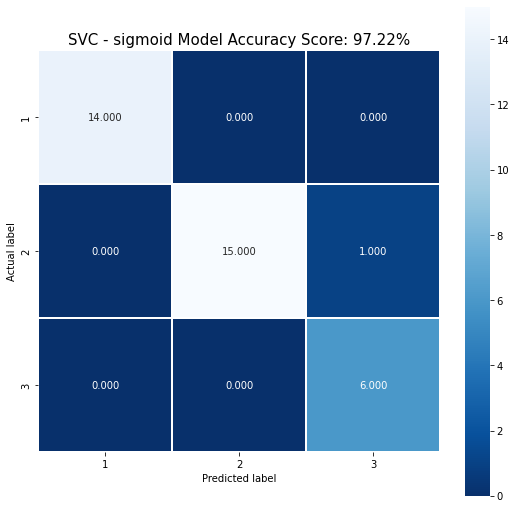

In [ ]:
# List of kernel functions to try
kernels = ["linear", "poly", "rbf", "sigmoid"]
class_names = ["1","2","3"]

# Dictionary to store the performance of each SVM classifier
performance = {}

for kernel in kernels:
    # Train an SVM classifier using the current kernel function
    clf = SVC(kernel=kernel)
    clf.fit(X_train, y_train)

    # Predict the target values for the testing data
    y_pred = clf.predict(X_test)

    # Compute the performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', yticklabels=class_names, xticklabels=class_names)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    all_sample_title = f'SVC - {kernel} Model Accuracy Score: {accuracy:.2%}'
    plt.title(all_sample_title, size = 15)

    print(classification_report(y_test, y_pred,labels = [0, 1], target_names=class_names))

    # Store the performance metrics for the current SVM classifier
    performance[kernel] = {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

# Find the kernel with the best performance
best_kernel = max(performance, key=lambda x: performance[x]["f1"])

# Print the best kernel and its performance metrics
print("Best kernel: {}".format(best_kernel))
print("Accuracy: {:.2f}".format(performance[best_kernel]["accuracy"]))
print("Precision: {:.2f}".format(performance[best_kernel]["precision"]))
print("Recall: {:.2f}".format(performance[best_kernel]["recall"]))
print("F1-score:{:.2f}".format(performance[best_kernel]["f1"]))





In [ ]:
# Best SVC Kernel is linear with Accuracy: 0.95 Precision: 0.95 Recall: 0.97 F1-score:0.96
# We will use this model for feature selection

clf = SVC(kernel="linear")
clf.fit(X_train, y_train)

# Use SelectFromModel to select the most important features
sfm = SelectFromModel(clf, prefit=True)
new_X_train = sfm.transform(X_train)
selected_features = X_train.columns[sfm.get_support()]
new_X_test = sfm.transform(X_test)

# Print the shape of the new feature matrix to see how many features were retained
print("Number of retained features: {}".format(new_X_train.shape[1]))


# Get the names of the selected features


# Print the names of the selected features
print("Selected features:")
print(selected_features)



Number of retained features: 6
Selected features:
Index(['alcohol', 'ash', 'flavanoids', 'color_intensity',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.94      0.97        16

   micro avg       1.00      0.97      0.98        30
   macro avg       1.00      0.97      0.98        30
weighted avg       1.00      0.97      0.98        30

Accuracy: 97.22%
Precision: 97.62%
Recall: 97.22%
F1-score:97.28%


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:2126: UserWarning: labels size, 2, does not match size of target_names, 3
  warnings.warn(


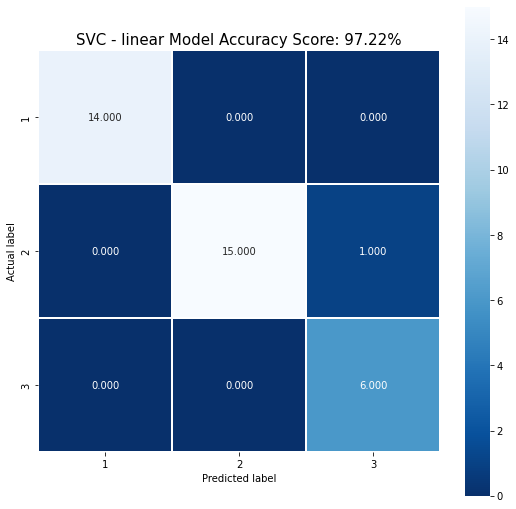

In [ ]:
# Re-run the model with new feature set

clf = SVC(kernel="linear")
clf.fit(new_X_train, y_train)

# Predict the target values for the testing data
y_pred = clf.predict(new_X_test)

# Compute the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', yticklabels=class_names, xticklabels=class_names)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f'SVC - linear Model Accuracy Score: {accuracy:.2%}'
plt.title(all_sample_title, size = 15)

print(classification_report(y_test, y_pred,labels = [0, 1], target_names=class_names))

print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1-score:{:.2%}".format(f1))


## K-Nearest Neighbor (KNN) Implementation

we define a range of hyperparameters to search over, including the number of neighbors (n_neighbors), the weighting scheme (weights), and the value of p for the Minkowski distance metric (p). We use GridSearchCV to search over this range of hyperparameters and find the best hyperparameters that give the highest accuracy on the validation set.

Mean test score: 95.84% for hyperparameters: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Mean test score: 95.84% for hyperparameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Mean test score: 94.43% for hyperparameters: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Mean test score: 94.43% for hyperparameters: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Mean test score: 94.41% for hyperparameters: {'n_neighbors': 3, 'p': 3, 'weights': 'uniform'}
Mean test score: 94.41% for hyperparameters: {'n_neighbors': 3, 'p': 3, 'weights': 'distance'}
Mean test score: 93.69% for hyperparameters: {'n_neighbors': 3, 'p': 4, 'weights': 'uniform'}
Mean test score: 93.69% for hyperparameters: {'n_neighbors': 3, 'p': 4, 'weights': 'distance'}
Mean test score: 93.69% for hyperparameters: {'n_neighbors': 3, 'p': 5, 'weights': 'uniform'}
Mean test score: 93.69% for hyperparameters: {'n_neighbors': 3, 'p': 5, 'weights': 'distance'}
Mean test score: 97.22% for hyperparameters: {'n_neighb

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:2126: UserWarning: labels size, 2, does not match size of target_names, 3
  warnings.warn(


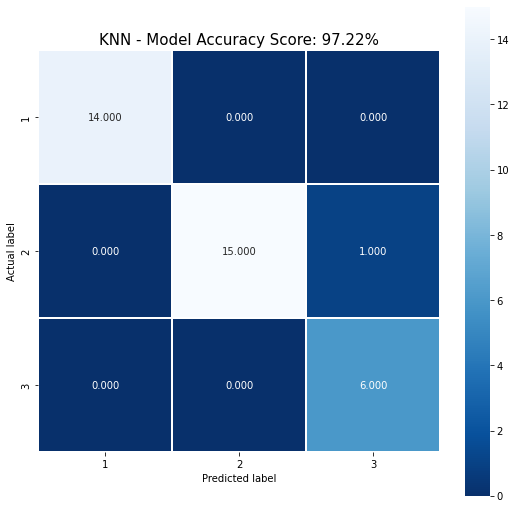

In [ ]:
# Define the range of hyperparameters to search over
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3, 4, 5]
}

# Train a KNeighborsClassifier with GridSearchCV
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the results of the GridSearchCV
results = grid_search.cv_results_

# Print the mean test scores for each hyperparameter combination
for mean_test_score, params in zip(results['mean_test_score'], results['params']):
    print("Mean test score: {:.2f}% for hyperparameters: {}".format(mean_test_score * 100, params))

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train a KNeighborsClassifier using the best hyperparameters
knn = KNeighborsClassifier(**best_params)
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average ='weighted')
recall = recall_score(y_test, y_pred,average ='weighted')
f1 = f1_score(y_test, y_pred,average ='weighted')

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', yticklabels=class_names, xticklabels=class_names)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f'KNN - Model Accuracy Score: {accuracy:.2%}'
plt.title(all_sample_title, size = 15)

print(classification_report(y_test, y_pred,labels = [0, 1], target_names=class_names))

print("Best hyperparameters", best_params)
print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1-score:{:.2%}".format(f1))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.94      0.97        16

   micro avg       1.00      0.97      0.98        30
   macro avg       1.00      0.97      0.98        30
weighted avg       1.00      0.97      0.98        30

Accuracy: 97.22%
Precision: 97.62%
Recall: 97.22%
F1-score:97.28%


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:2126: UserWarning: labels size, 2, does not match size of target_names, 3
  warnings.warn(


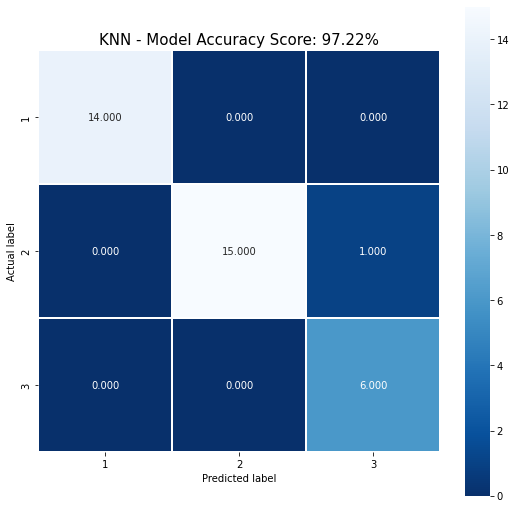

In [ ]:
# Re run the best Hyperparameter model with reduced features

clf = KNeighborsClassifier(**best_params)
clf.fit(new_X_train, y_train)

# Predict the target values for the testing data
y_pred = clf.predict(new_X_test)

# Compute the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average ='weighted')
recall = recall_score(y_test, y_pred, average ='weighted')
f1 = f1_score(y_test, y_pred, average ='weighted')

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', yticklabels=class_names, xticklabels=class_names)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f'KNN - Model Accuracy Score: {accuracy:.2%}'
plt.title(all_sample_title, size = 15)

print(classification_report(y_test, y_pred,labels = [0, 1], target_names=class_names))

print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1-score:{:.2%}".format(f1))

## Random Forest classifier Implementation

Following parameters will be used to select optimal configuration for Random forest.

**n_estimators:** This parameter defines the number of trees in the forest. A larger number of trees can result in a more accurate model, but also increases the computational time.

**max_depth**: This parameter sets the maximum depth of each tree in the forest. A deeper tree can capture more complex relationships in the data, but also increases the risk of overfitting.

**min_samples_split**: This parameter sets the minimum number of samples required to split an internal node in a tree. A higher value for this parameter results in more conservative trees, which can help to reduce overfitting.



Mean test score: 98.62% for hyperparameters: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}
Mean test score: 98.62% for hyperparameters: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 200}
Mean test score: 98.62% for hyperparameters: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 300}
Mean test score: 97.91% for hyperparameters: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100}
Mean test score: 98.62% for hyperparameters: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 200}
Mean test score: 98.62% for hyperparameters: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 300}
Mean test score: 98.62% for hyperparameters: {'max_depth': 3, 'min_samples_split': 6, 'n_estimators': 100}
Mean test score: 98.62% for hyperparameters: {'max_depth': 3, 'min_samples_split': 6, 'n_estimators': 200}
Mean test score: 98.62% for hyperparameters: {'max_depth': 3, 'min_samples_split': 6, 'n_estimators': 300}
Mean test score: 98.62% for hyperpara

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:2126: UserWarning: labels size, 2, does not match size of target_names, 3
  warnings.warn(


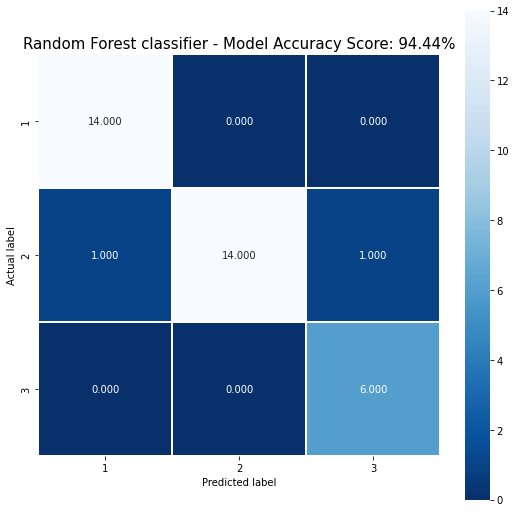

In [ ]:
# Define the hyperparameters to be tuned
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [3, 4, 5],
              'min_samples_split': [2, 4, 6]}

# Train a Random Forest classifier with GridSearchCV
rfc = RandomForestClassifier()
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the results of the GridSearchCV
results = grid_search.cv_results_

# Print the mean test scores for each hyperparameter combination
for mean_test_score, params in zip(results['mean_test_score'], results['params']):
    print("Mean test score: {:.2f}% for hyperparameters: {}".format(mean_test_score * 100, params))


# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Predict the target values for the test data
rfc = RandomForestClassifier(**best_params)
rfc.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rfc.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average ='weighted')
recall = recall_score(y_test, y_pred, average ='weighted')
f1 = f1_score(y_test, y_pred, average ='weighted')

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', yticklabels=class_names, xticklabels=class_names)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f'Random Forest classifier - Model Accuracy Score: {accuracy:.2%}'
plt.title(all_sample_title, size = 15)

print(classification_report(y_test, y_pred,labels = [0, 1], target_names=class_names))

print("Best hyperparameters", best_params)
print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1-score:{:.2%}".format(f1))

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:2126: UserWarning: labels size, 2, does not match size of target_names, 3
  warnings.warn(


              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93        16

   micro avg       0.97      0.93      0.95        30
   macro avg       0.97      0.94      0.95        30
weighted avg       0.97      0.93      0.95        30

Accuracy: 94.44%
Precision: 95.03%
Recall: 94.44%
F1-score:94.41%


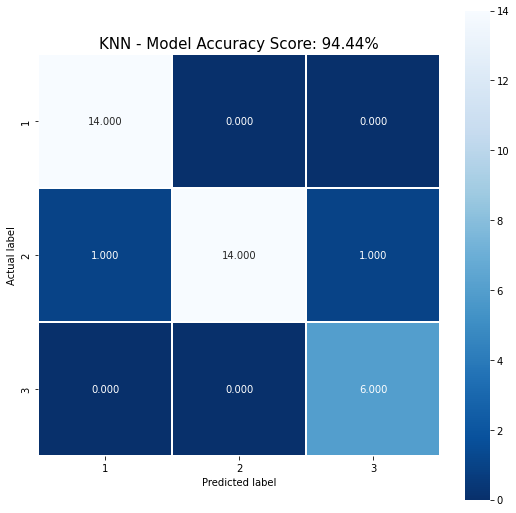

In [ ]:
# Re run the best Hyperparameter model with reduced features

clf = RandomForestClassifier(**best_params)
clf.fit(new_X_train, y_train)

# Predict the target values for the testing data
y_pred = clf.predict(new_X_test)

# Compute the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average ='weighted')
recall = recall_score(y_test, y_pred, average ='weighted')
f1 = f1_score(y_test, y_pred, average ='weighted')

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', yticklabels=class_names, xticklabels=class_names)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f'KNN - Model Accuracy Score: {accuracy:.2%}'
plt.title(all_sample_title, size = 15)

print(classification_report(y_test, y_pred,labels = [0, 1], target_names=class_names))

print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1-score:{:.2%}".format(f1))